In [2]:
from keras.datasets import mnist

(train_data, train_label), (test_data, test_label) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


In [3]:
train_data.shape

(60000, 28, 28)

In [0]:
import numpy as np

# 圖片資料處理
train_data_reshape = (train_data.reshape(60000, 784)-127.5)/127.5
test_data_reshape = (test_data.reshape(10000, 784)-127.5)/127.5

# label要經過embedding，所以先資料處理

train_label_reshape = train_label.reshape(-1,1)
test_label_reshape = test_label.reshape(-1,1)

In [0]:
random_input = 100

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, multiply
from keras.layers import Dropout, BatchNormalization

generator = Sequential()

generator.add(Dense(256, activation="relu", input_shape=(random_input,)))
generator.add(BatchNormalization())
generator.add(Dense(512, activation="relu"))
generator.add(BatchNormalization())
generator.add(Dense(784, activation="tanh"))

generator.summary()

W0806 09:44:22.933862 140495074895744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0806 09:44:22.975549 140495074895744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0806 09:44:22.982923 140495074895744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0806 09:44:23.094812 140495074895744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 784)               402192    
Total params: 562,704
Trainable params: 561,168
Non-trainable params: 1,536
_________________________________________________________________


In [7]:
from keras.models import Model
from keras.layers import Input

gen_noise = Input(shape=(random_input,))
gen_label = Input(shape=(1,)) 

x = Embedding(input_dim=10, output_dim=100)(gen_label)
x = Flatten()(x) # (1,100) => (100,)

gen_input = multiply([x, gen_noise])
gen_output = generator(gen_input)

cgenerator = Model(inputs=[gen_noise,gen_label],outputs=gen_output)
cgenerator.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 100)       1000        input_2[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 100)          0           embedding_1[0][0]                
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
multiply_1

In [8]:
discriminator = Sequential()

discriminator.add(Dense(512, activation="relu", input_shape=(784,)))
discriminator.add(Dropout(0.25))
discriminator.add(Dense(256, activation="relu"))
discriminator.add(Dropout(0.25))
discriminator.add(Dense(128, activation="relu"))
discriminator.add(Dropout(0.25))
discriminator.add(Dense(1, activation="sigmoid"))

discriminator.summary()

W0806 09:44:23.601382 140495074895744 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total para

In [9]:
dis_noise = Input(shape=(784,))
dis_label = Input(shape=(1,)) 

x = Embedding(input_dim=10, output_dim=784)(dis_label)
x = Flatten()(x) # (1,784) => (784,)

dis_input = multiply([x, dis_noise])
dis_output = discriminator(dis_input)

cdiscriminator = Model(inputs=[dis_noise,dis_label],outputs=dis_output)
cdiscriminator.summary()

cdiscriminator.compile(loss='binary_crossentropy', optimizer="adam")

W0806 09:44:23.843734 140495074895744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0806 09:44:23.870627 140495074895744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0806 09:44:23.878190 140495074895744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 1, 784)       7840        input_4[0][0]                    
__________________________________________________________________________________________________
flatten_2 (Flatten)             (None, 784)          0           embedding_2[0][0]                
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
multiply_2

In [10]:
cgan_noise = Input(shape=(random_input,))
cgan_label = Input(shape=(1,)) 

for i in cdiscriminator.layers:
  i.trainable = False

x = cgenerator([cgan_noise,cgan_label])
cgan_output = cdiscriminator([x,cgan_label])

cgan = Model(inputs = [cgan_noise,cgan_label], outputs = cgan_output)
cgan.summary()

cgan.compile(loss='binary_crossentropy', optimizer="adam")

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 784)          563704      input_5[0][0]                    
                                                                 input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 1)            574113      model_1[1][0]                    
          

In [11]:
epoch = 100
batch = 200

for i in range(epoch):
  for j in range(int(train_data.shape[0]/batch)):
    # 要訓練的資料索引
    idx = np.random.randint(0, train_data.shape[0], batch)
    # 要訓練的真圖片 
    imgs = train_data_reshape[idx]
    # 要訓練的答案
    label = train_label_reshape[idx]
    
    # 真假答案
    real = np.ones((batch, 1))
    fake = np.zeros((batch, 1))
    
    noise = np.random.normal(0, 1, (batch, random_input))
    fake_imgs = cgenerator.predict([noise, label])
    
    cd_loss_real = cdiscriminator.train_on_batch([imgs,label], real)
    cd_loss_fake = cdiscriminator.train_on_batch([fake_imgs,label], fake)
    
    cd_loss = (cd_loss_real + cd_loss_fake)/2
    
    noise = np.random.normal(0, 1, (batch, random_input))
    
    cg_loss = cgan.train_on_batch([noise,label], real)
  if (i+1)%10 == 0:
    print(cd_loss)
    print(cg_loss)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0.020339520648121834
1.1028836
0.346563458442688
2.4595609
0.49091315269470215
1.4696993
0.4870837330818176
1.2960787
0.4670040011405945
1.438208
0.5813850164413452
1.2300524
0.5302263498306274
1.2428735
0.49498963356018066
1.307239
0.5855629444122314
1.118682
0.5446199774742126
1.1941336


請輸入想生成的數字：4


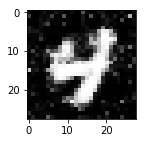

In [46]:
import matplotlib.pyplot as plt
input_self = int(input("請輸入想生成的數字：")) 
label = np.array([input_self])
label
noise = np.random.normal(0, 1, (1, random_input))
cgen_imgs = cgenerator.predict([noise, label])

cgen_imgs = (cgen_imgs*127.5+127.5).reshape(28, 28)
plt.figure(figsize=(2,2))
plt.imshow(cgen_imgs, cmap="gray")